<a href="https://colab.research.google.com/github/GiorgosMaragkopoulos/Quantum-data-encoding-using-QAE-PQAE/blob/main/QAE_Seed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Autoencoders (QAEs) for latent space encoding of the Seed dataset vs linear autoencoders

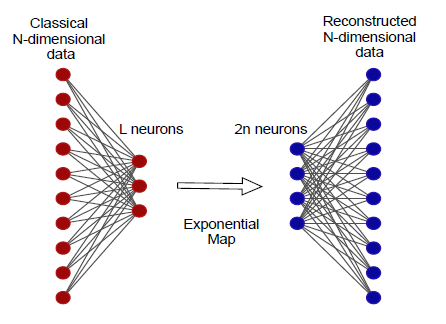

In this jupyter notebook, I present the implementation of a Quantum autoencoder (QAE), which is essentially an autoencoder with a quantum feature map in the bottleneck. There will be a comparison between the performance of the model in terms of the reconstruction error with the QAE encoding VS without it (same structure, without the quantum feature map). The dataset in this example is going to be the Iris dataset, $l^2$-normalized per row.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,MinMaxScaler , Normalizer
from torch.nn.functional import normalize
import pandas as pd

def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
    torch.backends.cudnn.deterministic = True  # may slow down training.
    torch.backends.cudnn.benchmark = False

# Example usage
set_seed(3)


# Load Iris dataset
seed_data = pd.read_csv('https://raw.githubusercontent.com/GiorgosMaragkopoulos/Quantum-data-encoding-using-QAE-PQAE/main/seeds.txt', delimiter='\t', header=None)

X = seed_data.iloc[:,:7]
y = seed_data.iloc[:,7]

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to PyTorch tensor before normalization
normalizer = Normalizer(norm='l2')
X = normalizer.fit_transform(X)


# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)

# Define the autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(7, 3)  # 4 inputs to 3 nodes (bottleneck)
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 4),
            nn.Linear(4,7)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Instantiate the model, define loss function and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.001)

# Training the autoencoder
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, X)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [500/10000], Loss: 0.0150
Epoch [1000/10000], Loss: 0.0042
Epoch [1500/10000], Loss: 0.0041
Epoch [2000/10000], Loss: 0.0042
Epoch [2500/10000], Loss: 0.0042
Epoch [3000/10000], Loss: 0.0041
Epoch [3500/10000], Loss: 0.0041
Epoch [4000/10000], Loss: 0.0042
Epoch [4500/10000], Loss: 0.0042
Epoch [5000/10000], Loss: 0.0041
Epoch [5500/10000], Loss: 0.0042
Epoch [6000/10000], Loss: 0.0042
Epoch [6500/10000], Loss: 0.0041
Epoch [7000/10000], Loss: 0.0041
Epoch [7500/10000], Loss: 0.0042
Epoch [8000/10000], Loss: 0.0042
Epoch [8500/10000], Loss: 0.0042
Epoch [9000/10000], Loss: 0.0041
Epoch [9500/10000], Loss: 0.0042
Epoch [10000/10000], Loss: 0.0042


# Polynomial Featuremap

In [2]:
class Clifford_Autoencoder(nn.Module):
    def __init__(self):
        super(Clifford_Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(7, 3)  # 4 inputs to 2 nodes (bottleneck)
        )
        self.decoder = nn.Sequential(
            nn.Linear(4, 7)  # 3 nodes to 4 outputs
        )

        self.q0 = torch.tensor([[1], [0]], dtype=torch.cfloat)

    def forward(self, x):
        x = self.encoder(x)

        # Polynomial feature map
        x1_cube = x[:, 0:1] ** 2
        x2_cube = x[:, 1:2] ** 2
        x3_cube = x[:, 2:3] ** 2

        x1_x2_x3 = x[:, 0:1] * x[:, 1:2] + x[:, 0:1] * x[:, 2:3] + x[:, 1:2]* x[:, 2:3]

        # Combine the polynomial features
        poly_features = torch.cat((x1_cube, x2_cube, x3_cube, x1_x2_x3 ), dim=-1)

        x = self.decoder(poly_features)

        return x

  # Instantiate the model, define loss function and optimizer
model = Clifford_Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.001)

# Training the autoencoder
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, X)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [500/10000], Loss: 0.0232
Epoch [1000/10000], Loss: 0.0070
Epoch [1500/10000], Loss: 0.0053
Epoch [2000/10000], Loss: 0.0050
Epoch [2500/10000], Loss: 0.0049
Epoch [3000/10000], Loss: 0.0048
Epoch [3500/10000], Loss: 0.0047
Epoch [4000/10000], Loss: 0.0046
Epoch [4500/10000], Loss: 0.0046
Epoch [5000/10000], Loss: 0.0046
Epoch [5500/10000], Loss: 0.0046
Epoch [6000/10000], Loss: 0.0045
Epoch [6500/10000], Loss: 0.0045
Epoch [7000/10000], Loss: 0.0045
Epoch [7500/10000], Loss: 0.0045
Epoch [8000/10000], Loss: 0.0045
Epoch [8500/10000], Loss: 0.0045
Epoch [9000/10000], Loss: 0.0044
Epoch [9500/10000], Loss: 0.0044
Epoch [10000/10000], Loss: 0.0044


# The Quantum Autoencoder starts with an input layer of 7 neurons and passes to the bottleneck which is a hidden layer of 3 neurons. These 3 neurons are used as coefficients to the generator, and 2 complex numbers form 4 real numbers (2 real numbers and 2 imaginary numbers), which are then decoded to the original 7 dimensional output.

In [3]:
class Quantum_Autoencoder(nn.Module):
    def __init__(self):
        super(Quantum_Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(7, 3)  # 4 inputs to 3 nodes (bottleneck)
        )
        self.decoder = nn.Sequential(
            nn.Linear(4, 7)  # 3 nodes to 4 outputs
        )


        self.pauli_matrices = torch.zeros(3,1, 2, 2, dtype=torch.cfloat)


        self.q0 = torch.tensor([[1], [0]], dtype=torch.cfloat)
        self.q1 = torch.tensor([[0], [1]], dtype=torch.cfloat)

        # Define the Pauli matrices
        self.sigma1 = torch.tensor([[1, 0], [0, 1]], dtype=torch.complex64)
        self.sigma2 = torch.tensor([[0, 1], [1, 0]], dtype=torch.complex64)
        self.sigma3 = torch.tensor([[0, -1j], [1j, 0]], dtype=torch.complex64)
        self.sigma4 = torch.tensor([[1, 0], [0, -1]], dtype=torch.complex64)

        self.pauli_matrices[0,:,:,:] = self.sigma2
        self.pauli_matrices[1,:,:,:] = self.sigma3
        self.pauli_matrices[2,:,:,:] = self.sigma4





    def forward(self, x):
        x = self.encoder(x)

        input_expanded = x.view(208, 3, 1, 1)

        result_tensors = []

        for i in range(1):
          input_batch = input_expanded[:,(i*3):(i*3+3),:,:]
          matrix_expanded = self.pauli_matrices.view(1, 3, 1, 2, 2)
          result_matrix = torch.sum(input_batch.view(208, 3, 1, 1, 1) * matrix_expanded, dim=1).squeeze(1)

          exp_matrix = torch.matrix_exp(1j*result_matrix)
          Final_state = torch.matmul(exp_matrix,self.q0).squeeze(dim=2)
          Real_Imag = torch.cat((Final_state.real, Final_state.imag), dim=1)

          result_tensors.append(Real_Imag)

        concatenated_result = torch.cat(result_tensors, dim=1)

        x = self.decoder(concatenated_result)

        return x




# Instantiate the model, define loss function and optimizer
qae = Quantum_Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(qae.parameters(), lr=0.001)

# Training the autoencoder
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    outputs = qae(X)
    loss = criterion(outputs, X)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [500/10000], Loss: 0.0081
Epoch [1000/10000], Loss: 0.0041
Epoch [1500/10000], Loss: 0.0033
Epoch [2000/10000], Loss: 0.0028
Epoch [2500/10000], Loss: 0.0026
Epoch [3000/10000], Loss: 0.0026
Epoch [3500/10000], Loss: 0.0026
Epoch [4000/10000], Loss: 0.0025
Epoch [4500/10000], Loss: 0.0025
Epoch [5000/10000], Loss: 0.0025
Epoch [5500/10000], Loss: 0.0025
Epoch [6000/10000], Loss: 0.0025
Epoch [6500/10000], Loss: 0.0025
Epoch [7000/10000], Loss: 0.0025
Epoch [7500/10000], Loss: 0.0025
Epoch [8000/10000], Loss: 0.0025
Epoch [8500/10000], Loss: 0.0025
Epoch [9000/10000], Loss: 0.0025
Epoch [9500/10000], Loss: 0.0025
Epoch [10000/10000], Loss: 0.0025


The reconstruction loss is 2 times lower in the quantum autoencoder, in contrast to the purely classical version.